In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from numpy import percentile

### Overview

In [139]:
df = pd.read_csv('Adops & Data Scientist Sample Data - Q2 Regression.csv',header = None)

In [140]:
print(df.shape)
df.columns = ['A', 'B', 'C'] 
df.head()

(300, 3)


,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [141]:
# data preprocession
df.isna().sum()

A    0
B    0
C    0
dtype: int64

### Implementation of linear regression

In this specific question, Y = b0 + b1x1 + b2x2 + error and we can rewrite it into matrix format which is Y = XB + error
And the least squares solution for b is equal to (X'X)^(-1)X'Y
Note that:This works only if the inverse exists. If the inverse does not exist, the
normal equations can still be solved, but the solution may not be unique. The
inverse of X! X exists, if the columns of X are linearly independent. That means
that no column can be written as a linear combination of the other columns

In [142]:
#Set up X and add a column with all a's
X = df.iloc[:,0:2].to_numpy()
X = np.column_stack((np.asarray([1]*300), X))
X.shape

(300, 3)

In [143]:
#Set up Y
Y = df.iloc[:,2].to_numpy()
Y.shape

(300,)

In [144]:
# Estimate Betas by using Beta = (X'X)^(-1)X'Y
#X_dash = X.transpose()
Betas = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [145]:
Betas

array([-19.2937528 ,  -8.0672204 ,  -1.77801157])

In [146]:
# yhat = Xβhat
fitted_Y = X.dot(Betas.T)

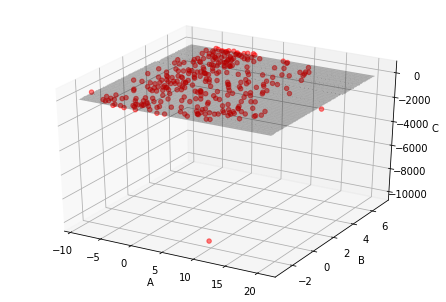

In [147]:
# data visualization
x_surf,y_surf = np.meshgrid(np.linspace(df.A.min(),df.A.max(),300),np.linspace(df.B.min(),df.B.max(),300))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['A'],df['B'],df['C'],c = 'red',marker = 'o',alpha = 0.5)
ax.plot_surface(x_surf,y_surf,fitted_Y.reshape((300,1)),color = 'None',alpha = 0.3 )
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.show()


### Further Development
We can see that there is an obvious outlier in our data, and since there is just one outlier we can drop it from our data set and refit our regression to get a better fit. And we can also spend some time to investigate the detail. In addition, other non-linear regression models can also be tested to see if they produce a better result. However, for this specific question, from the graph I think linear regression is a decent solution and it is easy to implement and we less worried about overfitting(when we have more features). In addition, test can also be done to see the goodness of fit for this regression. I always prefer simple algorithm if they can solve the problem decently 